In [4]:
import pandas as pd
df=pd.read_csv('test2.csv')
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,...,No Deposit,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,0,169,2017,August,35,30,2,9,2,0,...,No Deposit,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,0,204,2017,August,35,29,4,10,2,0,...,No Deposit,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,0,211,2017,August,35,31,4,10,2,0,...,No Deposit,40,NULL,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [17]:
cr=df

In [7]:
pd.get_dummies(df['Country'])
#경우의 수가 많으면 column의 수가 많아짐
# feature selection, 다중공선성 등을 고려해 해결해야함

,AGO,ALB,AND,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,UGA,UKR,URY,USA,UZB,VEN,VNM,ZAF,ZMB,ZWE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sum(cr[:5])

In [18]:
sum(cr[-100:]['Country_Ratio'])

KeyError: 'Country_Ratio'

In [1]:
#one-hot encoding 할때, 경우의 수가 많은 경우 처리방안
len(set(df['Country']))

NameError: name 'df' is not defined

In [19]:
top_5=cr[:5]['Country']
top_5

0    PRT
1    PRT
2    GBR
3    GBR
4    GBR
Name: Country, dtype: object

In [20]:
'GBR' in top_5
#top_5에 GBR에 있으면? -> 참거짓

False

In [21]:
def country_hot(country):
    if country in top_5:
        return country
    else:
        return 'other'

In [22]:
sample=['PRT', 'GBR', 'KOR', 'JPN']
for country in sample:
    print(country_hot(country))

other
other
other
other


In [27]:
#apply 적용
df['Country_Simple']=df['Country'].apply(lambda x: country_hot(x))
pd.get_dummies(df['Country_Simple'])
#125->6

,other
0,1
1,1
2,1
3,1
4,1
...,...
40055,1
40056,1
40057,1
40058,1


if x in top_5:
    return x
else:
    return 'other'

x if x in top_5 else 'other'

In [31]:
#차를 가져오는 경우와 아닌경우를 car_yes롤 저장
df['car_yes']=0

In [32]:
df.loc[df['RequiredCarParkingSpaces']==1]=1

In [36]:
df.loc[df['car_yes']==1]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Country_Simple,car_yes
25,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
29,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
53,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
54,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
55,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40006,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
40014,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
40022,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
40026,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1


In [ ]:
#답

In [81]:
set(df['RequiredCarParkingSpaces'])

{0, 1, 2, 3, 8}

In [82]:
df['car_yes']=0

In [83]:
df.loc[df['RequiredCarParkingSpaces']>0, 'car_yes']=1

In [84]:
set(df['car_yes'])

{0, 1}

In [ ]:
# 고객이 예약한 상품과 고객에게 할당한 상품이 같을때와 다를때에 관한 정보 추가

In [45]:
def roomtype_Same(a, b):
    if df[a]==df[b]:
        return 1
    else:
        return 0

In [59]:
df['RoomType_Same']=[df['ReservedRoomType'],df['AssignedRoomType']].apply(roomtype_Same('ReservedRoomType', 'AssignedRoomType'))


AttributeError: 'list' object has no attribute 'apply'

In [65]:
#답 'ReservedRoomType', 'AssignedRoomType' same 여부
df=pd.read_csv('test2.csv')

In [66]:
set(df['ReservedRoomType'])

{'A               ',
 'B               ',
 'C               ',
 'D               ',
 'E               ',
 'F               ',
 'G               ',
 'H               ',
 'L               ',
 'P               '}

In [67]:
set(df['AssignedRoomType'])

{'A               ',
 'B               ',
 'C               ',
 'D               ',
 'E               ',
 'F               ',
 'G               ',
 'H               ',
 'I               ',
 'L               ',
 'P               '}

In [68]:
df['ReservedRoomType']=df['ReservedRoomType'].apply(lambda x : x[:1])

In [70]:
df['AssignedRoomType']=df['AssignedRoomType'].apply(lambda x: x[:1])
#안예쁜 데이터 변경

In [71]:
df['RA']=df['ReservedRoomType']+df['AssignedRoomType']
df['RA']

0        CC
1        CC
2        AC
3        AA
4        AA
         ..
40055    AA
40056    EE
40057    EE
40058    DD
40059    AA
Name: RA, Length: 40060, dtype: object

In [78]:
df['RA_Changed']=df['RA'].apply(lambda x : 0 if x[0]==x[1] else 1)

In [76]:
import numpy as np

In [79]:
np.mean(df['RA_Changed'])
#예약한 객실과 할당된 객실이 다른경우 : 약 20%

0.19283574638042936

In [85]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'RA', 'RA_Canged', 'RA_Changed', 'car_yes'],
      dtype='object')

In [87]:
interested=['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'RA', 'RA_Canged', 'RA_Changed', 'car_yes']
#day_stay, foreigner, country_Ratio, country simple

In [89]:
df[interested].to_csv('test2_modify', index=False)

In [91]:
df2=pd.read_csv('test2_modify')
df2.head().T

,0,1,2,3,4
IsCanceled,0,0,0,0,0
LeadTime,342,737,7,13,14
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,1,1,2
Adults,2,2,1,1,2
Children,0,0,0,0,0


# EDA
- 그래프를 그리기 위해 column골라야 함


In [92]:
df.describe().columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'RA_Canged',
       'RA_Changed', 'car_yes'],
      dtype='object')

In [97]:
label='IsCanceled'
features=['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'RA_Canged',
       'RA_Changed', 'car_yes']
#

In [98]:
x, y=df[features], df[label]
#column수가 많음 -> 경우의 수를 줄이는데 중점 -> embed방식 활용

In [104]:
#영향력이 가장 높은것은?

#1. module import
#2. model 생성
#3. feature_importances_
#4. 정렬

In [ ]:
#안됨

In [110]:
from sklearn.ensemble import RandomForestClassifier as rf

In [111]:
model=rf()
model.fit(x, y)

RandomForestClassifier()

In [112]:
from sklearn.feature_selection import RFE
selector=RFE(model)
selector.fit(x, y)

KeyboardInterrupt: 

In [ ]:
rfe_df=pd.DataFrame()
rfe_df['rank']=selector.ranking_
rfe_df['feature']=features
rfe_df.sort_values(by='rank')

In [121]:
##embed

In [122]:
#1
from sklearn.ensemble import RandomForestClassifier as rf

In [123]:
#2
model=rf()
model.fit(x, y)

RandomForestClassifier()

In [125]:
model

RandomForestClassifier()

In [126]:
model.feature_importances_

array([0.21422514, 0.02752105, 0.10460625, 0.10838439, 0.0370335 ,
       0.06667789, 0.0193957 , 0.0140625 , 0.00235665, 0.00353592,
       0.03584141, 0.00634954, 0.03102131, 0.00238081, 0.16923867,
       0.03433014, 0.03936963, 0.02953755, 0.02892596, 0.02520599])

In [127]:
#3
ft_imp=pd.DataFrame()
ft_imp['importance']=model.feature_importances_
ft_imp['feature']=features

In [128]:
ft_imp

,importance,feature
0,0.214225,LeadTime
1,0.027521,ArrivalDateYear
2,0.104606,ArrivalDateWeekNumber
3,0.108384,ArrivalDateDayOfMonth
4,0.037034,StaysInWeekendNights
5,0.066678,StaysInWeekNights
6,0.019396,Adults
7,0.014062,Children
8,0.002357,Babies
9,0.003536,IsRepeatedGuest


In [129]:
#4
ft_imp_sort=ft_imp.sort_values(by='importance', ascending=False)
ft_imp_sort
#leadtime - 얼마나 전에 예약했나

,importance,feature
0,0.214225,LeadTime
14,0.169239,ADR
3,0.108384,ArrivalDateDayOfMonth
2,0.104606,ArrivalDateWeekNumber
5,0.066678,StaysInWeekNights
16,0.039370,TotalOfSpecialRequests
4,0.037034,StaysInWeekendNights
10,0.035841,PreviousCancellations
15,0.034330,RequiredCarParkingSpaces
12,0.031021,BookingChanges


In [132]:
df.groupby('LeadTime').agg({label:np.mean}).reset_index()

#LeadTime이 0이면 당일예약, 1이면 하루전 예약을 의미


,LeadTime,IsCanceled
0,0,0.048517
1,1,0.055172
2,2,0.091587
3,3,0.079345
4,4,0.066365
...,...,...
407,471,1.000000
408,532,0.000000
409,542,0.000000
410,709,0.000000


In [147]:
tgt=df.groupby('LeadTime').agg({label:np.mean}).reset_index()

In [134]:
import seaborn as sns

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

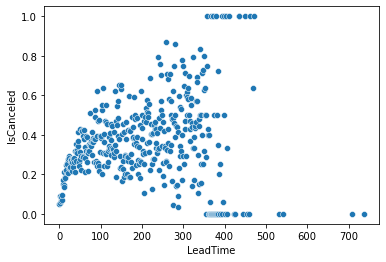

In [148]:
tgt1=tgt.loc[tgt['LeadTime']<80]
sns.scatterplot(data=tgt, x='LeadTime', y='IsCanceled')

In [ ]:
#일주일 전에 예약한 고객은 예약 취소율이 낮음
#LeadTime이 늘어날 수록 취소율이 높아짐
#20-40사이에 예약한 고객은 20-30%정도 취소율을 보임
#20일 기준/-/형태
#50일 기준 무작위로 퍼진 형태
#LeadTime이 적은 구간에서 선형성을 지님

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

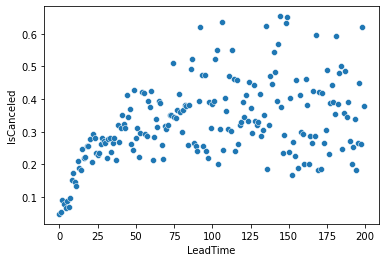

In [150]:
tgt2=tgt.loc[tgt['LeadTime']<200]
sns.scatterplot(data=tgt2, x='LeadTime', y='IsCanceled')

In [151]:
hue='Foreigner'
df.groupby(['LeadTime', hue]).agg({label:np.mean})

KeyError: 'Foreigner'

In [154]:
tget=df.groupby(['LeadTime', hue]).agg({label:np.mean}).reset_index()
tget=tget.loc[tget['LeadTime']<200]
sns.scatterplot(data=tget, x='LeadTime', y='IsCanceled', hue=hue)

KeyError: 'RA_Change'

In [155]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'RA', 'RA_Canged', 'RA_Changed', 'car_yes'],
      dtype='object')

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

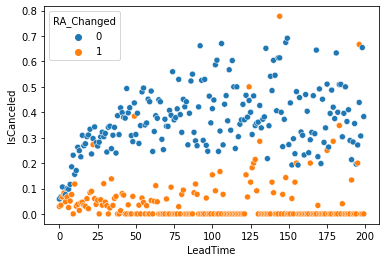

In [156]:
hue='RA_Changed'
df.groupby(['LeadTime', hue]).agg({label:np.mean})
tget=df.groupby(['LeadTime', hue]).agg({label:np.mean}).reset_index()
tget=tget.loc[tget['LeadTime']<200]
sns.scatterplot(data=tget, x='LeadTime', y='IsCanceled', hue=hue)

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

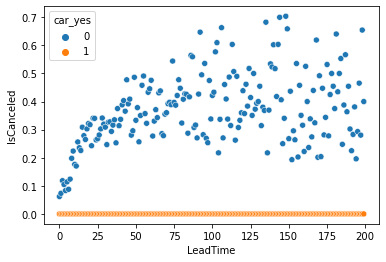

In [157]:
hue='car_yes'
df.groupby(['LeadTime', hue]).agg({label:np.mean})
tget=df.groupby(['LeadTime', hue]).agg({label:np.mean}).reset_index()
tget=tget.loc[tget['LeadTime']<200]
sns.scatterplot(data=tget, x='LeadTime', y='IsCanceled', hue=hue)

In [158]:
df.columns
#'MarketSegment'- 예약 경로

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'RA', 'RA_Canged', 'RA_Changed', 'car_yes'],
      dtype='object')

In [ ]:
#어떤 경로로 예약했는지에 대한 column을 기반으로 의미있는 문장을 도출하시오
